# 第3部　記述統計

## 7章　グラフの活用

### 実装：分析の準備

In [1]:
# 数値計算に使うライブラリ
import numpy as np
import pandas as pd

# グラフを描画するライブラリ
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# 表示設定(書籍本文のレイアウトと合わせるためであり、必須ではありません)
np.set_printoptions(linewidth=60)
pd.set_option('display.width', 60)

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 8, 4

### 実装：分析対象となるデータの読み込み

#### 2つの数量データ

In [3]:
# 2つの数量データ
cov_data = pd.read_csv('3-5-1-cov.csv')
print(cov_data.head(3))

      x   y
0  18.5  34
1  18.7  39
2  19.1  41


In [4]:
# 折れ線グラフのためのデータ(2つの数量データ)
lineplot_df = pd.read_csv('3-7-1-lineplot-data.csv')
print(lineplot_df.head(3))

   x  y
0  0  2
1  1  3
2  2  4


#### 数量データとカテゴリーデータが混ざったデータ

In [5]:
# 数量データとカテゴリーデータが混ざったデータ
fish_multi = pd.read_csv('3-6-1-fish_multi.csv')
print(fish_multi.head(3))

  species  length
0       A       2
1       A       3
2       A       3


In [6]:
# seaborn組み込みのペンギンのデータを取得
penguins = sns.load_dataset('penguins')
print(penguins.head(3))

  species     island  bill_length_mm  bill_depth_mm  \
0  Adelie  Torgersen            39.1           18.7   
1  Adelie  Torgersen            39.5           17.4   
2  Adelie  Torgersen            40.3           18.0   

   flipper_length_mm  body_mass_g     sex  
0              181.0       3750.0    Male  
1              186.0       3800.0  Female  
2              195.0       3250.0  Female  


### 実装：散布図

<AxesSubplot:xlabel='x', ylabel='y'>

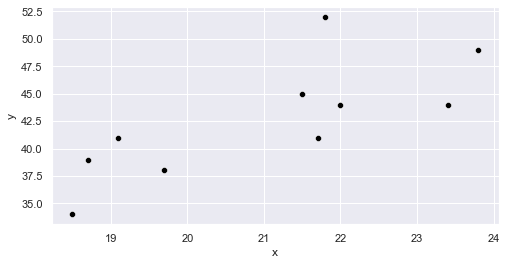

In [7]:
sns.scatterplot(x='x', y='y', data=cov_data, color='black')

In [8]:
# 参考：相関係数(書籍には載っていないコードです)
np.corrcoef(cov_data['x'], cov_data['y'])

array([[1.       , 0.7592719],
       [0.7592719, 1.       ]])

### 実装：グラフの装飾と保存

#### 日本語を表記する準備

In [9]:
# グラフの日本語表記
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = 'Meiryo'

#### グラフの装飾と保存

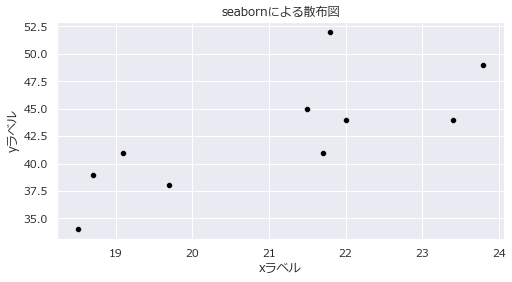

In [10]:
# 散布図
sns.scatterplot(x='x', y='y', data=cov_data, color='black')

# 装飾
plt.title('seabornによる散布図') # グラフタイトル
plt.xlabel('xラベル')            # X軸ラベル
plt.ylabel('yラベル')            # Y軸ラベル

# グラフの保存
plt.savefig('散布図の例.jpeg')

### 実装：折れ線グラフ

<AxesSubplot:xlabel='x', ylabel='y'>

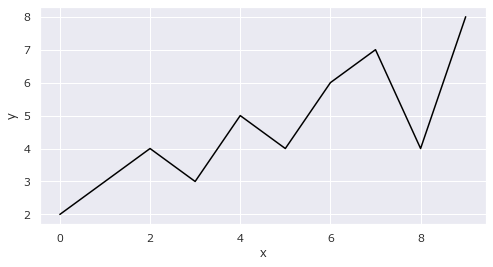

In [11]:
sns.lineplot(x='x', y='y', data=lineplot_df, color='black')

### 実装：棒グラフ

<AxesSubplot:xlabel='species', ylabel='length'>

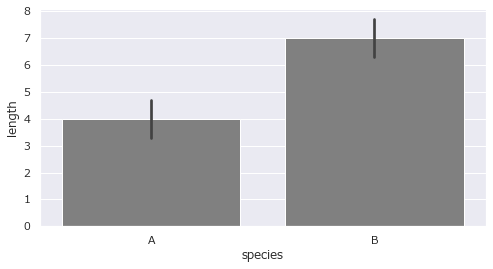

In [12]:
sns.barplot(x='species', y='length', 
            data=fish_multi, color='gray')

### 実装：箱ひげ図

<AxesSubplot:xlabel='species', ylabel='length'>

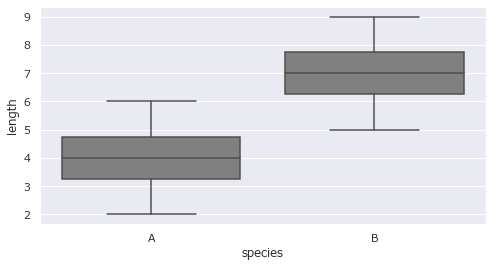

In [13]:
# 箱髭図
sns.boxplot(x='species', y='length', 
            data=fish_multi, color='gray')

In [14]:
print(fish_multi.groupby("species").describe())

        length                                          
         count mean       std  min   25%  50%   75%  max
species                                                 
A         10.0  4.0  1.154701  2.0  3.25  4.0  4.75  6.0
B         10.0  7.0  1.154701  5.0  6.25  7.0  7.75  9.0


### 実装：バイオリンプロット

<AxesSubplot:xlabel='species', ylabel='length'>

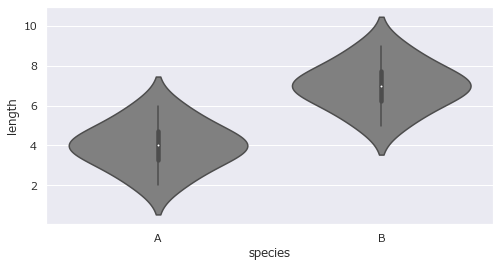

In [15]:
sns.violinplot(x='species', y='length', 
            data=fish_multi, color='gray')

### 用語：figure-level関数とaxis-level関数

ここでは、本文を補足するPythonコードを実装しています。<br>
本文中には記載のないコードですので注意してください。

#### 散布図の例

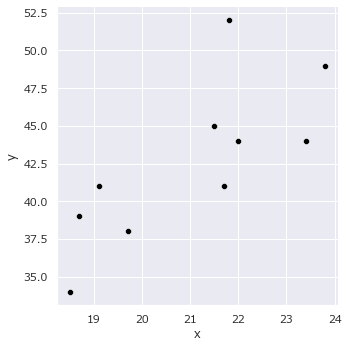

In [16]:
# 散布図
sns.relplot(kind='scatter',
            x='x', y='y', data=cov_data,
            color='black')

#### 分布の可視化

In [17]:
bins = np.arange(2,11,1)
bins

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10])

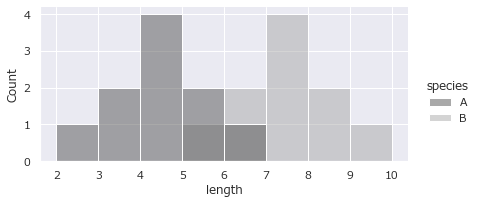

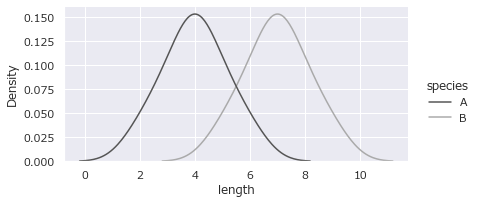

In [18]:
# figure-level関数

# ヒストグラム
sns.displot(kind='hist',
            x='length',      # x軸
            hue='species',   # 色分けの対象
            data=fish_multi, # データ
            bins=bins,       # bins
            palette='gray',
            height=3,
            aspect=2) 

# カーネル密度推定
sns.displot(kind='kde',
            x='length',      # x軸
            hue='species',   # 色分けの対象
            data=fish_multi, # データ
            palette='gray',
            height=3,
            aspect=2)

#### 数量データ同士のグラフ

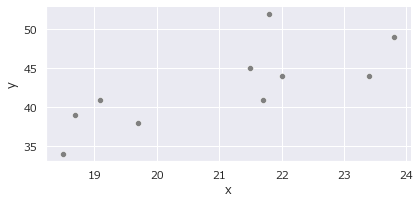

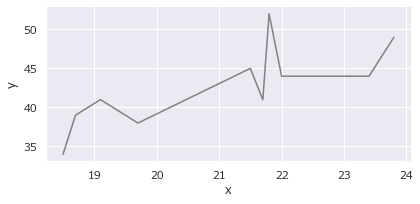

In [19]:
# figure-level関数

# 散布図
sns.relplot(kind='scatter',
            x='x',
            y='y',
            data=cov_data,
            color='gray',
            height=3,
            aspect=2)

# 折れ線グラフ
sns.relplot(kind='line',
            x='x',
            y='y',
            data=cov_data,
            color='gray',
            height=3,
            aspect=2)

#### カテゴリーデータと数量データのグラフ

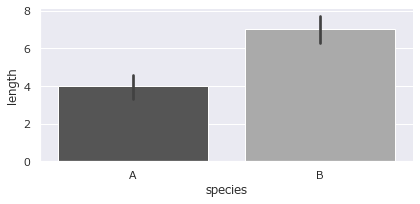

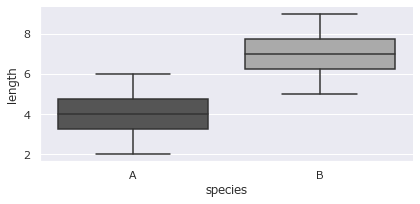

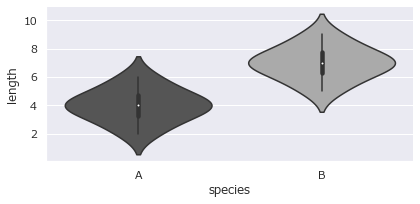

In [20]:
# figure-level関数

# 棒グラフ
sns.catplot(kind='bar',
            x='species',
            y='length',
            data=fish_multi,
            palette='gray',
            height=3,
            aspect=2) 

# 箱ひげ図
sns.catplot(kind='box',
            x='species',
            y='length',
            data=fish_multi,
            palette='gray',
            height=3,
            aspect=2) 

# バイオリンプロット
sns.catplot(kind='violin',
            x='species',
            y='length',
            data=fish_multi,
            palette='gray',
            height=3,
            aspect=2) 

### 実装：種別・性別のバイオリンプロット

<AxesSubplot:xlabel='species', ylabel='body_mass_g'>

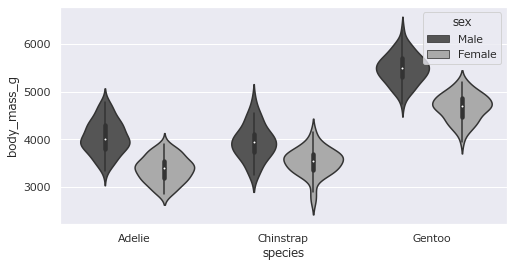

In [21]:
# axis-level関数

# 描画オブジェクトを生成
fig, ax = plt.subplots(figsize=(8, 4))

# バイオリンプロットの描画
sns.violinplot(x='species', y='body_mass_g', hue='sex',
               data=penguins, palette='gray',
               ax=ax)

### 実装：種別・性別・島別のバイオリンプロット

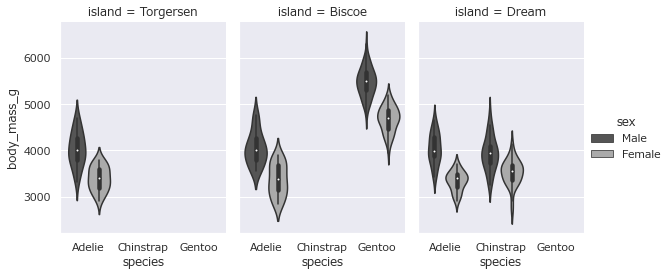

In [22]:
# figure-level関数
sns.catplot(kind='violin',
            x='species', y='body_mass_g', 
            hue='sex', col='island',
            data=penguins, palette='gray', 
            height=4, aspect=0.7)

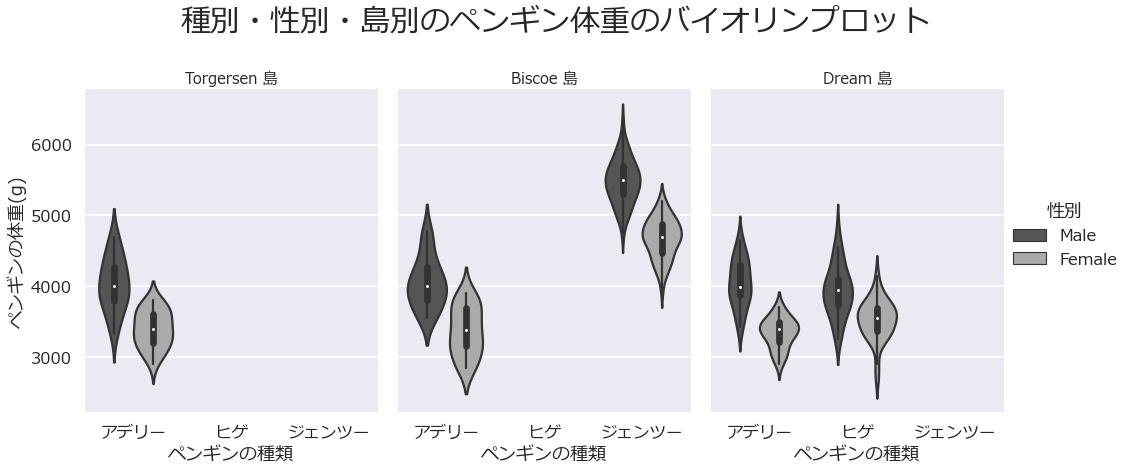

In [23]:
# 参考（本文には記載していません）
# 実装難易度がやや高いので、飛ばして大丈夫です

# グラフタイトルなどのつけ方など、より詳細なグラフの装飾の方法を解説します。

# 参考資料
# https://seaborn.pydata.org/generated/seaborn.catplot.html
# https://seaborn.pydata.org/generated/seaborn.FacetGrid.html#seaborn.FacetGrid
# http://seaborn.pydata.org/generated/seaborn.plotting_context.html
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.suptitle.html

# グラフのフォントを全体的に大きくする。
with sns.plotting_context('talk'):
    # figure-level関数でバイオリンプロットを描く
    g = sns.catplot(kind='violin',
                    x='species', y ='body_mass_g', 
                    hue='sex', col='island',
                    data=penguins, palette='gray', 
                    height=6, aspect=0.8)
    
    # X軸ラベル
    g.set_xlabels('ペンギンの種類')
    g.set_xticklabels(['アデリー', 'ヒゲ', 'ジェンツー']) # Adélie=アデリーペンギン、Chinstrap=ヒゲペンギン、Gentoo=ジェンツーペンギン
    
    # Y軸ラベル
    g.set_ylabels('ペンギンの体重(g)')

    # グラフごとのタイトル
    g.set_titles(col_template='{col_name} 島', size=15)

    # グラフ全体のタイトル
    g.fig.suptitle('種別・性別・島別のペンギン体重のバイオリンプロット', y=1.1, size=30)

    # 凡例のタイトル
    g.legend.set_title('性別')

### 実装：ペア・プロット

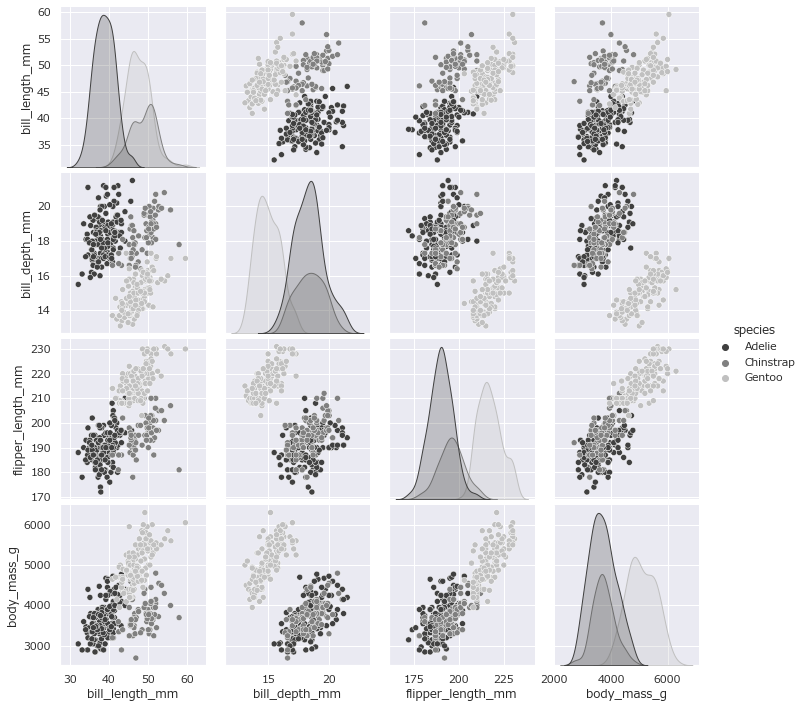

In [24]:
# ペアプロット
sns.pairplot(hue='species', data=penguins, palette='gray')